# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

其實先前在 kaggle learn 自修的時候已經練習過 Day 8 的內容，這邊再複習一遍，
<br>且搭配 [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data) 的資料可以在實戰上練習，而不只是操作自定義的數據。

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Merge / Transform

In [2]:
# 生成範例用的資料 ()
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

數據處理的 general  functions 可以參考 [pandas 的文檔](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html)，寫得很詳細。

In [3]:
# 沿縱軸合併
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [4]:
result = pd.concat([df1, df2, df3], axis= 1)
result

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [5]:
# 沿橫軸合併
result = pd.concat([df1, df4], axis = 1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [6]:
# 沿橫軸合併
result = pd.concat([df1, df4], axis = 1, join = 'inner') # 硬串接
print(result)

result = pd.merge(df1, df4, how='inner')
print(result)

    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3
    A   B   C   D   F
0  A2  B2  C2  D2  F2
1  A3  B3  C3  D3  F3


In [7]:
# 將 欄-列 逐一解開
print(df1)
df1.melt()

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3


,variable,value
0,A,A0
1,A,A1
2,A,A2
3,A,A3
4,B,B0
5,B,B1
6,B,B2
7,B,B3
8,C,C0
9,C,C1


## Subset

In [8]:
# 設定 data_path
dir_data = './data/'

In [9]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 取 TARGET 為 1 的
sub_df = app_train[app_train['TARGET'] == 1]
sub_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
sub_df_2 = app_train.loc[app_train['TARGET'] == 1]
sub_df_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# 取 AMT_INCOME_TOTAL 大於平均資料中，SK_ID_CURR, TARGET 兩欄
sub_df = app_train.loc[app_train['AMT_INCOME_TOTAL'] > app_train['AMT_INCOME_TOTAL'].mean(), ['SK_ID_CURR', 'TARGET']]
sub_df.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
6,100009,0
7,100010,0
13,100017,0


In [13]:
app_train['AMT_INCOME_TOTAL'].mean()

168797.9192969845

將'AMT_INCOME_TOTAL' 數值也一併 show 出，且看看是否大於平均。

In [14]:
sub_df = app_train.loc[app_train['AMT_INCOME_TOTAL'] > app_train['AMT_INCOME_TOTAL'].mean(), ['AMT_INCOME_TOTAL','SK_ID_CURR', 'TARGET']]
sub_df.head()

,AMT_INCOME_TOTAL,SK_ID_CURR,TARGET
0,202500.0,100002,1
1,270000.0,100003,0
6,171000.0,100009,0
7,360000.0,100010,0
13,225000.0,100017,0


## Groupby
見 Pandas 文檔 [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)

In [15]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


透過 groupby 可以將資料群體歸類，像'NAME_CONTRACT_TYPE' 中就只有兩類 "Cash loans","Revolving loans"

In [16]:
app_train.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

也可以將性別歸類，研究不同性別的關係。

In [17]:
app_train.groupby(['CODE_GENDER']).size()

CODE_GENDER
F      202448
M      105059
XNA         4
dtype: int64

In [18]:
app_train.groupby(['NAME_CONTRACT_TYPE']).mean()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,,,,
Cash loans,278125.362338,0.083459,0.410025,169069.513575,627965.732538,28244.263958,560563.664485,0.020748,-16159.256060,66310.442020,...,0.008349,0.000636,0.000561,0.000004,0.00639,0.007183,0.035370,0.271634,0.271091,1.931579
Revolving loans,278704.656375,0.054783,0.483828,166217.017656,324017.982172,16316.822637,325724.371573,0.022014,-14875.175313,40101.836709,...,0.006045,0.000205,0.000000,0.003484,0.00652,0.005240,0.024641,0.226529,0.211328,1.595304


In [19]:
app_train.groupby(['CODE_GENDER']).mean()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CODE_GENDER,,,,,,,,,,,,,,,,,,,,,
F,278235.964094,0.069993,0.392397,156032.309247,592766.717305,26304.815242,532406.220509,0.020728,-16502.507177,79693.262759,...,0.006693,0.000514,0.000454,0.000020,0.006212,0.006910,0.034590,0.261551,0.269703,1.924312
M,278076.627828,0.101419,0.464548,193396.482153,611095.197084,28657.681177,549942.314404,0.021138,-15140.050562,33220.412187,...,0.010899,0.000752,0.000609,0.000942,0.006776,0.007178,0.033915,0.278855,0.257166,1.852091
XNA,200636.500000,0.000000,0.750000,186750.000000,399375.000000,19968.750000,421875.000000,0.029672,-13561.250000,-4090.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,3.500000


In [20]:
app_train.groupby(['NAME_CONTRACT_TYPE'])['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_CONTRACT_TYPE,,,,,,,,
Cash loans,278232.0,169069.513575,245910.950896,25650.0,112500.0,153000.0,202500.0,117000000.0
Revolving loans,29279.0,166217.017656,126028.600660,27000.0,99000.0,135000.0,202500.0,4500000.0


In [21]:
app_train.groupby(['CODE_GENDER'])['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
CODE_GENDER,,,,,,,,
F,202448.0,156032.309247,274825.592570,25650.0,99000.0,135000.0,180000.0,117000000.0
M,105059.0,193396.482153,134597.169531,27000.0,135000.0,180000.0,225000.0,18000090.0
XNA,4.0,186750.000000,50445.515162,135000.0,151875.0,182250.0,217125.0,247500.0


可以看出男性平均收入較高，且標準差較低，女性最少收入比男性低，但可以看到 max 部分，女性高出男性10倍!!，這其中一定有可以研究的問題!!

In [22]:
app_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean()

NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054783
Name: TARGET, dtype: float64

In [23]:
# 取前 10000 筆作範例: 分別將 AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY 除以根據 NAME_CONTRACT_TYPE 分組後的平均數，
app_train.loc[0:10000, ['NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].groupby(['NAME_CONTRACT_TYPE']).apply(lambda x: x / x.mean())

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,1.205275,0.642827,0.871394
1,1.607034,2.045017,1.259386
2,0.415602,0.430829,0.430084
3,0.803517,0.494349,1.047292
4,0.723165,0.811049,0.771380
5,0.589246,0.775469,0.970773
6,1.017788,2.467495,1.457033
7,2.142711,2.418918,1.484338
8,0.669597,1.611995,1.193345
9,0.831203,1.292488,1.290253


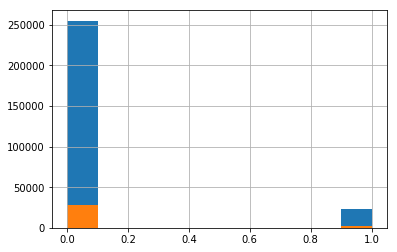

In [24]:
app_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].hist()
plt.show()

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [25]:
app_train.groupby(['CNT_CHILDREN']).describe()

SK_ID_CURR                                                     \
                  count           mean            std       min        25%   
CNT_CHILDREN                                                                 
0              215371.0  278241.087440  102742.655264  100002.0  189116.50   
1               61119.0  277874.907917  103024.345648  100009.0  188998.00   
2               26749.0  278910.119780  102617.051922  100029.0  190586.00   
3                3717.0  275570.381759  102966.244810  100108.0  184881.00   
4                 429.0  272406.734266  102413.265752  101324.0  184407.00   
5                  84.0  263936.702381  101212.990898  104024.0  177939.75   
6                  21.0  254632.047619  101504.113304  108386.0  153737.00   
7                   7.0  281302.285714  129808.307800  103596.0  182741.50   
8                   2.0  196781.000000  116067.335491  114709.0  155745.00   
9                   2.0  274260.500000  207151.881296  127782.0  201021.25   
10                  2.0  285179.500000   44407.012965  253779.0  269479.25   
11                  1.0  140032.000000            NaN  140032.0  140032.00   
12                  2.0  246087.500000   73870.738324  193853.0  219970.25   
14                  3.0  342536.666667   59059.638336  303956.0  308541.50   
19                  2.0  343992.500000   90346.326325  280108.0  312050.25   

                                               TARGET            ...  \
                   50%        75%       max     count      mean  ...   
CNT_CHILDREN                                                     ...   
0             278428.0  367061.00  456255.0  215371.0  0.077118  ...   
1             277193.0  367566.50  456246.0   61119.0  0.089236  ...   
2             279093.0  367458.00  456235.0   26749.0  0.087218  ...   
3             275099.0  365567.00  456245.0    3717.0  0.096314  ...   
4             267238.0  359521.00  456016.0     429.0  0.128205  ...   
5             258374.5  349361.25  455557.0      84.0  0.083333  ...   
6             286431.0  317544.00  429262.0      21.0  0.285714  ...   
7             320933.0  362802.50  453499.0       7.0  0.000000  ...   
8             196781.0  237817.00  278853.0       2.0  0.000000  ...   
9             274260.5  347499.75  420739.0       2.0  1.000000  ...   
10            285179.5  300879.75  316580.0       2.0  0.000000  ...   
11            140032.0  140032.00  140032.0       1.0  1.000000  ...   
12            246087.5  272204.75  298322.0       2.0  0.000000  ...   
14            313127.0  361827.00  410527.0       3.0  0.000000  ...   
19            343992.5  375934.75  407877.0       2.0  0.000000  ...   

             AMT_REQ_CREDIT_BUREAU_QRT        AMT_REQ_CREDIT_BUREAU_YEAR  \
                                   75%    max                      count   
CNT_CHILDREN                                                               
0                                 0.00    8.0                   185323.0   
1                                 0.00  261.0                    53362.0   
2                                 0.00    6.0                    23583.0   
3                                 0.00    8.0                     3258.0   
4                                 0.00    3.0                      355.0   
5                                 0.00    2.0                       76.0   
6                                 0.00    2.0                       16.0   
7                                 0.75    2.0                        6.0   
8                                 0.75    1.0                        2.0   
9                                 0.00    0.0                        2.0   
10                                0.00    0.0                        1.0   
11                                0.00    0.0                        1.0   
12                                0.00    0.0                        2.0   
14                                0.00    0.0                        3.0   
19                 

根據提示：參考 [pandas.cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html?highlight=cut) 的使用方式。

In [26]:
##### 1
"""
Your code here
"""
cut_rule = [-1,0,2,5,19]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, bins=cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-1.001, 0.0]    215371
(0.0, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [27]:
app_train['CNT_CHILDREN_GROUP']

0         (-1.001, 0.0]
1         (-1.001, 0.0]
2         (-1.001, 0.0]
3         (-1.001, 0.0]
4         (-1.001, 0.0]
5         (-1.001, 0.0]
6            (0.0, 2.0]
7         (-1.001, 0.0]
8         (-1.001, 0.0]
9         (-1.001, 0.0]
10           (0.0, 2.0]
11        (-1.001, 0.0]
12        (-1.001, 0.0]
13           (0.0, 2.0]
14        (-1.001, 0.0]
15        (-1.001, 0.0]
16        (-1.001, 0.0]
17           (0.0, 2.0]
18        (-1.001, 0.0]
19           (0.0, 2.0]
20        (-1.001, 0.0]
21           (0.0, 2.0]
22           (0.0, 2.0]
23        (-1.001, 0.0]
24           (0.0, 2.0]
25        (-1.001, 0.0]
26        (-1.001, 0.0]
27           (0.0, 2.0]
28        (-1.001, 0.0]
29        (-1.001, 0.0]
              ...      
307481    (-1.001, 0.0]
307482    (-1.001, 0.0]
307483    (-1.001, 0.0]
307484    (-1.001, 0.0]
307485       (0.0, 2.0]
307486       (0.0, 2.0]
307487    (-1.001, 0.0]
307488    (-1.001, 0.0]
307489    (-1.001, 0.0]
307490    (-1.001, 0.0]
307491       (0.

In [28]:
#2-1 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-1.001, 0.0]       0         166747.010980
                    1         160804.210548
(0.0, 2.0]          0         174590.584401
                    1         176115.362720
(2.0, 5.0]          0         175053.742913
                    1         160677.385714
(5.0, 19.0]         0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

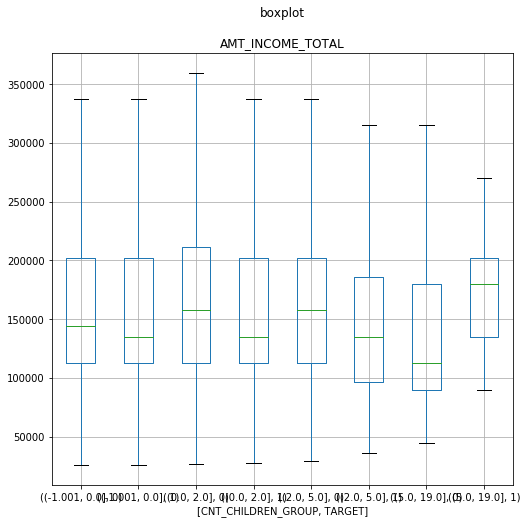

In [29]:
#2-2 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by =  ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(8,8))
plt.suptitle('boxplot')
plt.show()

根據 wiki 定義 z_score = (x-np.mean(x))/np.std(x)

In [30]:
#3 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換後的分數
"""
Your code here
"""

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-np.mean(x))/np.std(x) )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491536
1,270000.0,0.972437
2,67500.0,-0.934708
3,135000.0,-0.298993
4,121500.0,-0.426136
